In [1]:
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
df=pd.read_csv('heart.csv',encoding='latin-1')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
df.duplicated().sum()

1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: ylabel='Count'>

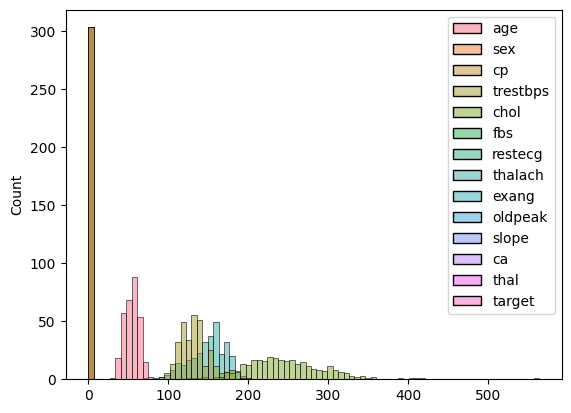

In [9]:
sns.histplot(data=df)

In [10]:
px.box(data_frame=df)

<Axes: >

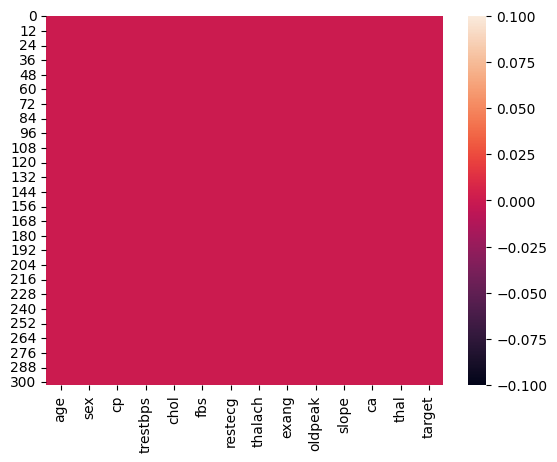

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

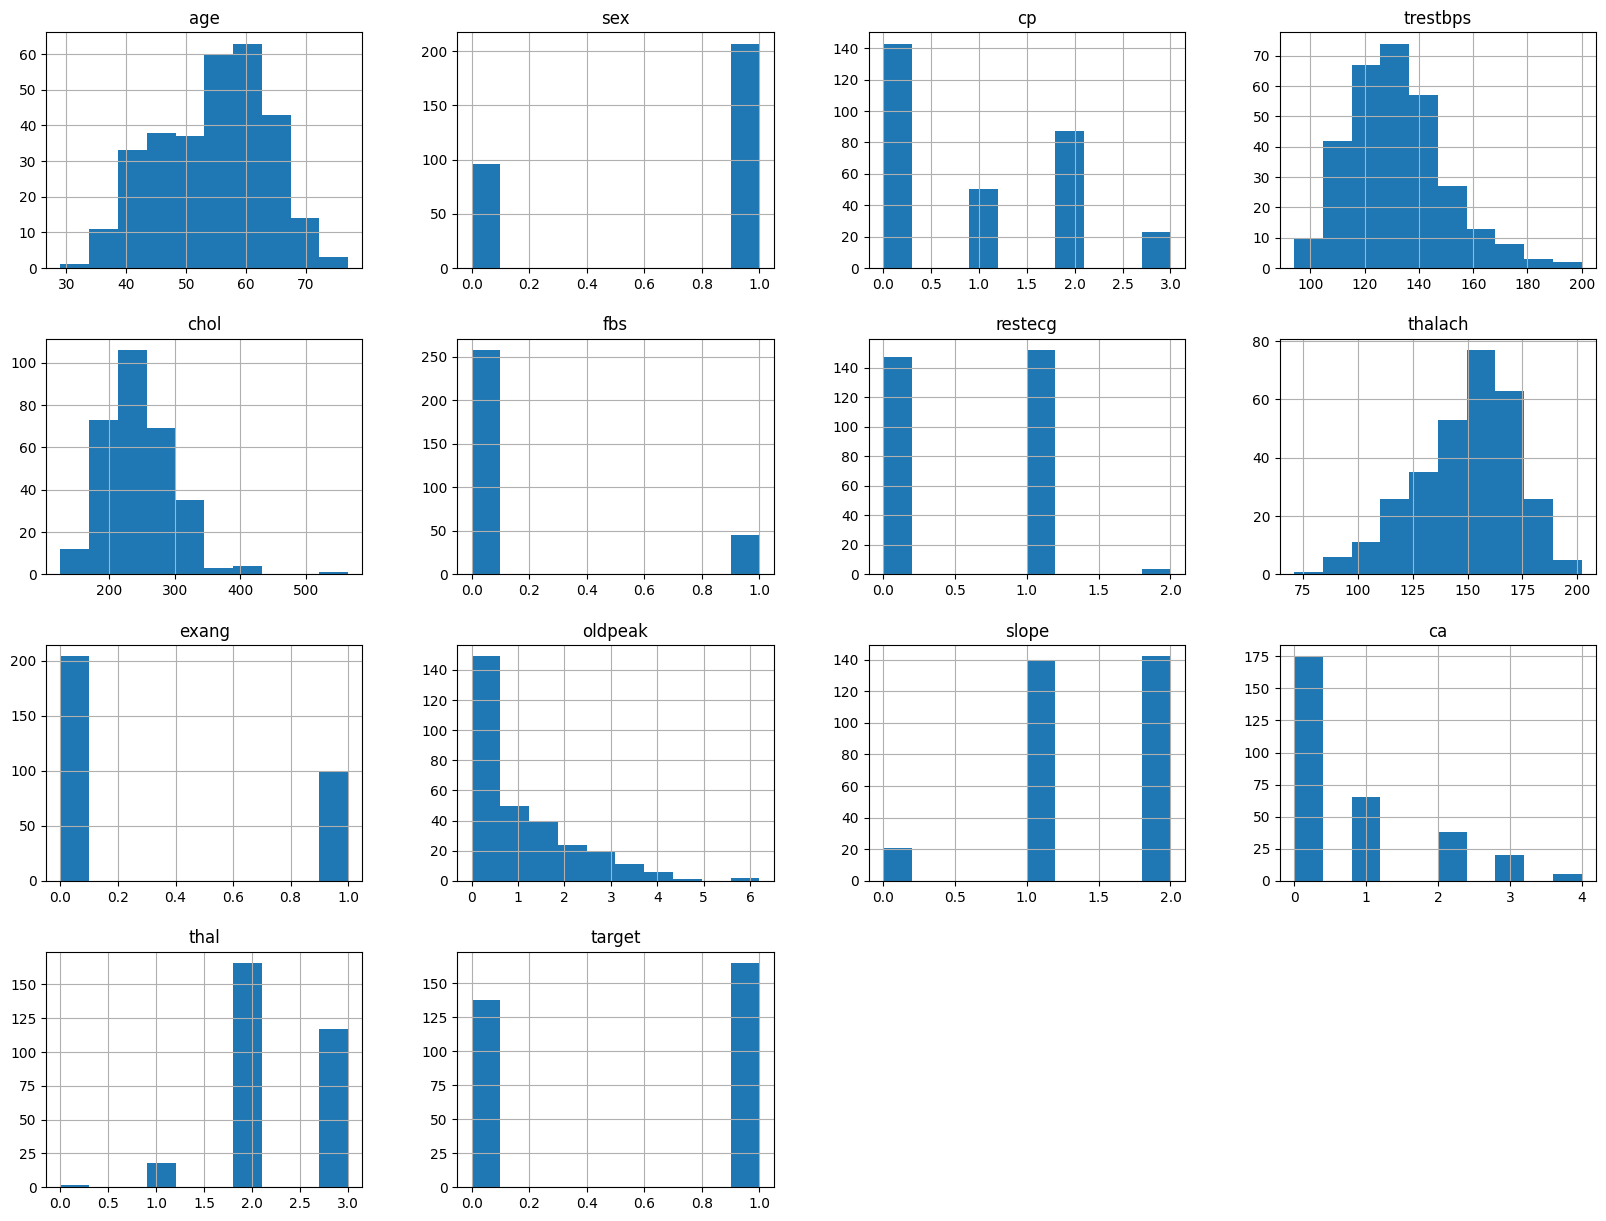

In [14]:
df.hist(figsize=(20,15))
plt.show()

In [15]:
cor=df.corr()

<Axes: >

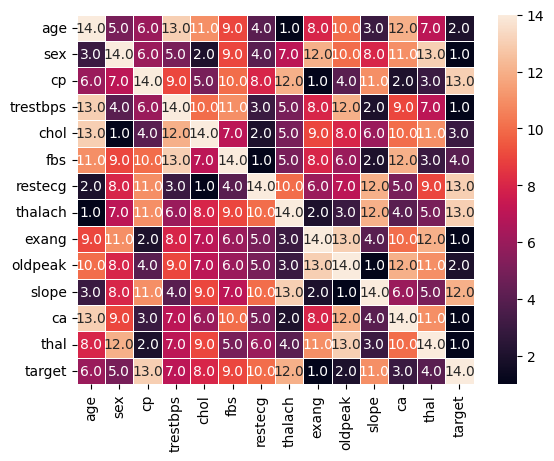

In [16]:
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f',linewidths=.5)

In [17]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
x=df.drop(['target'],axis=1)
y=df['target']

In [19]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=.8)

In [20]:
def all (model):
      model.fit(x_train,y_train)
      pre=model.predict(x_test)
      print(confusion_matrix(pre,y_test))
      print(classification_report(pre,y_test))

In [21]:
model1=KNeighborsClassifier()
all(model1)

[[20 12]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        32
           1       0.64      0.72      0.68        29

    accuracy                           0.67        61
   macro avg       0.68      0.67      0.67        61
weighted avg       0.68      0.67      0.67        61



In [22]:
model2=DecisionTreeClassifier()
all(model2)

[[20 12]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        32
           1       0.64      0.72      0.68        29

    accuracy                           0.67        61
   macro avg       0.68      0.67      0.67        61
weighted avg       0.68      0.67      0.67        61



In [23]:
model3=GaussianNB()
all(model3)

[[23  8]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        31
           1       0.76      0.83      0.79        30

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [24]:
model4=SVC()
all(model4)

[[15  4]
 [13 29]]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        19
           1       0.88      0.69      0.77        42

    accuracy                           0.72        61
   macro avg       0.71      0.74      0.71        61
weighted avg       0.77      0.72      0.73        61



In [25]:
model5=RandomForestClassifier()
all(model5)

[[23  9]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.73      0.83      0.77        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [26]:
model6=GradientBoostingClassifier()
all(model6)

[[22 10]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.70      0.79      0.74        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [27]:
import pickle
file_name='heartt.sav'
pickle.dump(model3,open(file_name,'wb'))
